# 1. Introduction

In this project, time-series analysis of stock price data from 11th March 2019 to 1st March will be conducted. The purpose of the analysis is to:

***1: Predict the future price of the stock using time series model***

***2: Predict the volatility of the return using time series model***

## 1.1 Methodology

To begin, the raw data will be processed to handle any missing values and abnormalities, the processed data then will be visualized for **Adjusted Closing Price** and **Return** for the period of analysis.

The **ARIMA** model for stock price forecasting due to its effectiveness, will be used in time series data. For modeling return volatility, we will apply the **GARCH** model, which is well-suited for capturing time-varying volatility.

# 2. Analysis

## 2.1 Data Processing

In [138]:
# Data Processing
"""
This script performs the following tasks:
1. Loads stock price data from a CSV file.
2. Displays the first five rows of the dataset.
3. Converts the 'Date' column to datetime format and sets it as the index.
4. Filters the dataset for the period between 01 May 2019 and 01 May 2023.
5. Identifies and handles missing values using linear interpolation.
6. Confirms the absence of missing values after interpolation.

"""
# Importing required libraries
import pandas as pd

# Loading dataset

data= pd.read_csv("TSLA.csv")

# Displaying the first five rows of the dataset
print(data.head())

# Converting the date column to datetime format (assuming 'Date' column exists)
data['Date'] = pd.to_datetime(data['Date'])

# Setting the 'Date' column as the index
data.set_index('Date', inplace=True)

# Filtering the data for the analysis period (01 May 2019 – 01 May 2023)
analysis_data = data.loc['2019-05-01':'2023-05-01']

# Checking for missing values
print("\nMissing Values in Each Column:")
print(analysis_data.isnull().sum())

# Interpolating missing values (linear interpolation)
analysis_data.interpolate(method='linear', inplace=True)

# Confirming missing values are handled
print("\nMissing Values After Interpolation:")
print(analysis_data.isnull().sum())


        Date       Open       High        Low      Close  Adj Close  \
0  3/11/2019  18.901333  19.418667  18.700001  19.394667  19.394667   
1  3/12/2019  19.099333  19.204666  18.737333  18.890667  18.890667   
2  3/13/2019  18.926666  19.466000  18.846666  19.264000  19.264000   
3  3/14/2019  19.496668  19.692667  19.219334  19.330667  19.330667   
4  3/15/2019  18.900667  18.914667  18.293333  18.362000  18.362000   

        Volume  
0  110884500.0  
1  112561500.0  
2  102670500.0  
3  106551000.0  
4  221782500.0  

Missing Values in Each Column:
Open          6
High          9
Low           9
Close         8
Adj Close    14
Volume        4
dtype: int64

Missing Values After Interpolation:
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


/var/folders/cn/lkkp822n0s72nd1skbywc23c0000gn/T/ipykernel_35464/1142369588.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  analysis_data.interpolate(method='linear', inplace=True)


*To maintain the data's variability, mean imputation was avoided.Instead, linear interpolation was used to estimate missing values, preserving the stock's natural trend.*

## 2.2 Visualization and Analysis

/var/folders/cn/lkkp822n0s72nd1skbywc23c0000gn/T/ipykernel_35464/1948549324.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Return'] = data['Adj Close'].pct_change()  # Percentage change for daily returns


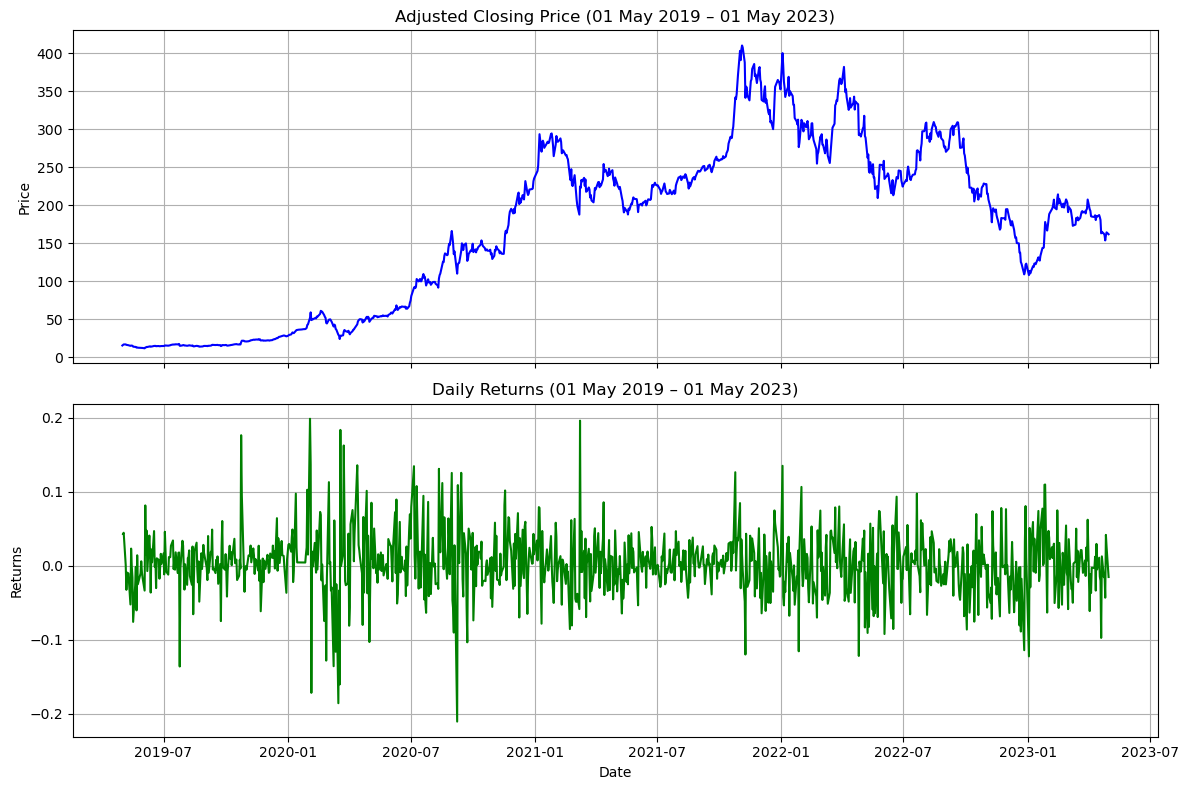


Adjusted Closing Price:
Mean: 171.9625
Variance: 11864.8761
Maximum: 409.9700
Minimum: 11.9313

Returns:
Mean: 0.003239
Variance: 0.001830
Maximum: 0.198949
Minimum: -0.210628


In [141]:
# Visualization of Adjusted Closing Price and Returns

"""
This script performs the following tasks:
1. Computes daily returns from the adjusted closing price of the cleaned dataset.
2. Plots the adjusted closing price and the corresponding returns over the period from 01 May 2019 to 01 May 2023.
3. Calculates and prints basic statistics (mean, variance, maximum, minimum) for both adjusted closing price and returns.
4. Ensures the analysis is performed on the already cleaned and interpolated dataset.
"""

# Importing required libraries
import matplotlib.pyplot as plt

def calculate_returns(data):
    """Calculates daily returns from the adjusted closing price."""
    data['Return'] = data['Adj Close'].pct_change()  # Percentage change for daily returns
    return data

# Ensure returns are calculated on the cleaned and filtered dataset
analysis_data = calculate_returns(analysis_data)

def print_basic_statistics(data):
    """Prints basic statistics for adjusted closing price and returns."""
   
    print("\nAdjusted Closing Price:")
    print(f"Mean: {data['Adj Close'].mean():.4f}"),print(f"Variance: {data['Adj Close'].var():.4f}"),print(f"Maximum: {data['Adj Close'].max():.4f}"),print(f"Minimum: {data['Adj Close'].min():.4f}")

    print("\nReturns:")
    print(f"Mean: {data['Return'].mean():.6f}"),print(f"Variance: {data['Return'].var():.6f}"),print(f"Maximum: {data['Return'].max():.6f}"), print(f"Minimum: {data['Return'].min():.6f}")


def plot_price_and_returns(data):
    """Plots adjusted closing price and daily returns on two subplots."""
    fig, axes = plt.subplots(2, 1, figsize=(12, 8), sharex=True)
    
    # Plot Adjusted Closing Price
    axes[0].plot(data.index, data['Adj Close'], color='blue')
    axes[0].set_title('Adjusted Closing Price (01 May 2019 – 01 May 2023)')
    axes[0].set_ylabel('Price')
    axes[0].grid(True)
    
    # Plot Returns
    axes[1].plot(data.index, data['Return'], color='green')
    axes[1].set_title('Daily Returns (01 May 2019 – 01 May 2023)')
    axes[1].set_ylabel('Returns')
    axes[1].set_xlabel('Date')
    axes[1].grid(True)
    
    plt.tight_layout()
    plt.show()

# Plot the adjusted closing price and returns using the cleaned dataset
plot_price_and_returns(analysis_data)
print_basic_statistics(analysis_data)

In [142]:
analysis_data

,Open,High,Low,Close,Adj Close,Volume,Return
Date,,,,,,,
2019-05-01,15.923333,16.000000,15.433333,15.600667,15.600667,160566000.0,NaN
2019-05-02,16.368000,16.553666,15.848000,16.273333,16.273333,272389500.0,0.043118
2019-05-03,16.257334,17.107332,16.232668,16.648000,17.002001,355602000.0,0.044777
2019-05-06,16.667999,17.223333,16.566668,17.022667,17.022667,162508500.0,0.001216
2019-05-07,17.120001,17.147333,16.340000,16.470667,16.470667,151971000.0,-0.032427
...,...,...,...,...,...,...,...
2023-04-25,159.820007,163.470001,158.750000,160.669998,160.669998,121999300.0,-0.011566
2023-04-26,160.289993,160.669998,153.139999,153.750000,153.750000,153364100.0,-0.043070
2023-04-27,152.639999,160.479996,152.369995,160.190002,160.190002,127015200.0,0.041886


*Returns were calculated using the percentage change method on the adjusted closing price, capturing daily stock performance variations.* 

The adjusted closing price shows an overall upward trend with fluctuations until January 2022, peaking around 410. After January 2022, the price gradually declines with continued fluctuations. Returns show high volatility before the year
2022, with sharp upward and downward movements. Post-January 2022, the returns show relatively lower deviation, indicating reduced volatility in stock performance.

## 2.3 Forecasting Future Prices (ARIMA model)
### 2.3.1 Stationarity
In general, if a series shows a trend (upward or downward), then it's likely non-stationary, this indicates that this series is non-stationary as it shows a trend. However, to confirm the results, we will employ augmented Dickey-Fuller test.

In [145]:
from statsmodels.tsa.stattools import adfuller

# Perform Augmented Dickey-Fuller (ADF) Test to check stationarity
def adf_test(series):
    """
    Conducts the Augmented Dickey-Fuller (ADF) test to check for stationarity.

    Parameters:
    series (pd.Series): Time series data to be tested.

    Outputs:
    Prints the test statistic, p-value, number of lags used, and number of observations used.
    Determines stationarity based on p-value.
    """
    result = adfuller(series, autolag='AIC')
    print("Augmented Dickey-Fuller Test Results:")
    print(f"Test Statistic: {result[0]}")
    print(f"p-value: {result[1]}")
    print(f"Number of Lags Used: {result[2]}")
    print(f"Number of Observations Used: {result[3]}")

    # Interpret the p-value
    if result[1] < 0.05:
        print("The series is stationary (no unit root).")
    else:
        print("The series is non-stationary (has a unit root).")

# Run the ADF test on the adjusted closing price column
adf_test(analysis_data['Adj Close'])


Augmented Dickey-Fuller Test Results:
Test Statistic: -1.709645089495641
p-value: 0.42615001346870907
Number of Lags Used: 18
Number of Observations Used: 989
The series is non-stationary (has a unit root).


**As the P-value is greater than 0.05, the series has a unit root; it's non-stationary, we will check at first difference now:**

In [147]:
import statsmodels.api as sm


# Function to check stationarity after differencing
def check_stationarity_diff(data):
    """ 
    Performs the Augmented Dickey-Fuller (ADF) test on the first difference of the adjusted closing price.

    Parameters:
    - data (DataFrame): Data containing the adjusted closing price column.

    Outputs:
    - Prints ADF test statistic, p-value, number of lags used, and number of observations used.
    - Prints conclusion on whether the differenced series is stationary.
    """

    # First-order differencing to stabilize mean and remove trend
    data['Adj Close Diff'] = data['Adj Close'].diff().dropna()

    # Perform the ADF test on the first difference
    adf_test = adfuller(data['Adj Close Diff'].dropna())

    # Extracting results
    test_statistic = adf_test[0]
    p_value = adf_test[1]
    used_lags = adf_test[2]
    observations = adf_test[3]

    # Print ADF test results
    print("ADF Test on First Difference:")
    print(f"Test Statistic: {test_statistic:.4f}")
    print(f"p-value: {p_value:.4f}")
    print(f"Number of Lags Used: {used_lags}")
    print(f"Number of Observations Used: {observations}")

    # Conclusion
    if p_value < 0.05:
        print("The first-differenced series is stationary (p < 0.05).\n")
    else:
        print("The first-differenced series is non-stationary (p >= 0.05).\n")

# Run the stationarity check on the first difference
check_stationarity_diff(analysis_data)

ADF Test on First Difference:
Test Statistic: -7.0117
p-value: 0.0000
Number of Lags Used: 17
Number of Observations Used: 989
The first-differenced series is stationary (p < 0.05).



/var/folders/cn/lkkp822n0s72nd1skbywc23c0000gn/T/ipykernel_35464/1610549449.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Adj Close Diff'] = data['Adj Close'].diff().dropna()


### 2.3.2 Determining Orders of p & q

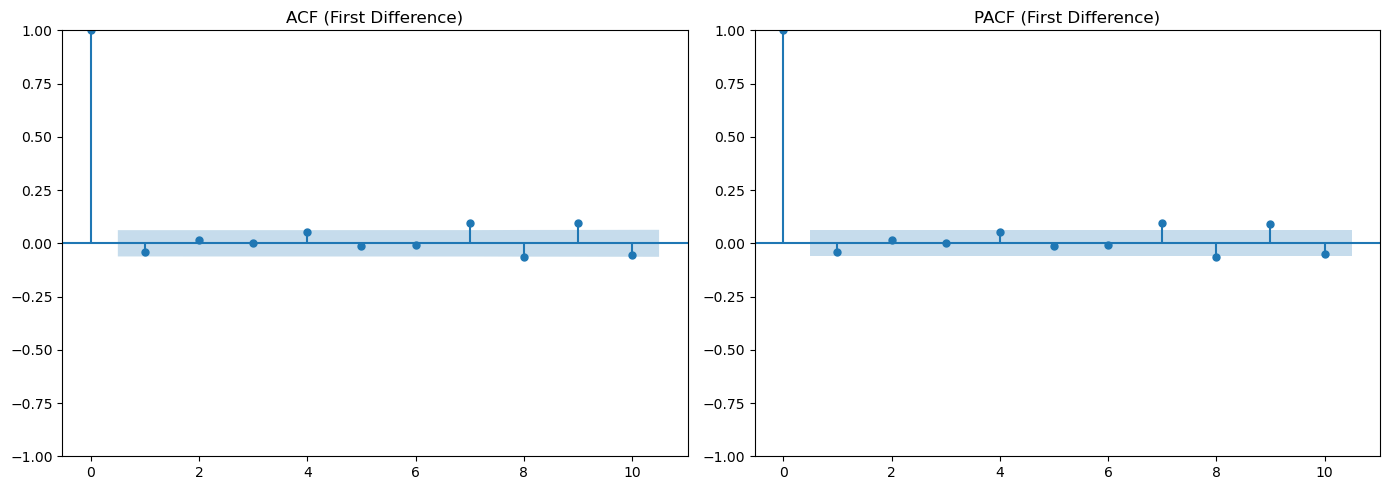

In [149]:
def plot_acf_pacf(data, lags=10):
    """Plots the ACF and PACF for the first difference of the adjusted closing price."""
    
    # First difference to achieve stationarity
    data_diff = data['Adj Close'].diff().dropna()

    # Plotting ACF and PACF
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))

    # Autocorrelation Function (ACF) - Identifies MA (q)
    sm.graphics.tsa.plot_acf(data_diff, lags=lags, ax=axes[0], title='ACF (First Difference)')

    # Partial Autocorrelation Function (PACF) - Identifies AR (p)
    sm.graphics.tsa.plot_pacf(data_diff, lags=lags, ax=axes[1], title='PACF (First Difference)', method='yw')

    plt.tight_layout()
    plt.show()

# Call the function to plot ACF and PACF with 10 lags
plot_acf_pacf(analysis_data, lags=10)

**The ACF and PACF plots indicate significant spikes at lags 7 and 9, suggesting potential values for the AR (p) and MA (q) parameters. To identify the optimal ARIMA model, we will use a grid search approach, exploring combinations of p and q from 0 to 9, with d fixed at 1.**

### 2.3.3 Training and Running the Model

/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dat

Trying ARIMA(0, 1, 0): AIC = 5649.36968791005
Trying ARIMA(0, 1, 1): AIC = 5649.945429305406
Trying ARIMA(0, 1, 2): AIC = 5651.928639009344
Trying ARIMA(0, 1, 3): AIC = 5653.631107078796
Trying ARIMA(0, 1, 4): AIC = 5655.323809187787
Trying ARIMA(0, 1, 5): AIC = 5656.684669266485


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dat

Trying ARIMA(0, 1, 6): AIC = 5658.216204667757


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Trying ARIMA(0, 1, 7): AIC = 5644.406140438821


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Trying ARIMA(0, 1, 8): AIC = 5639.646269419391


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Trying ARIMA(0, 1, 9): AIC = 5640.004301629693
Trying ARIMA(1, 1, 0): AIC = 5649.963420066962
Trying ARIMA(1, 1, 1): AIC = 5651.936679814484
Trying ARIMA(1, 1, 2): AIC = 5653.908189800302


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dat

Trying ARIMA(1, 1, 3): AIC = 5655.552837623628


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Trying ARIMA(1, 1, 4): AIC = 5653.164759385997
Trying ARIMA(1, 1, 5): AIC = 5652.424385507948


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dat

Trying ARIMA(1, 1, 6): AIC = 5645.827850612603


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Trying ARIMA(1, 1, 7): AIC = 5638.288841931162


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Trying ARIMA(1, 1, 8): AIC = 5640.041767438486


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Trying ARIMA(1, 1, 9): AIC = 5641.739454435937
Trying ARIMA(2, 1, 0): AIC = 5651.912415570995


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dat

Trying ARIMA(2, 1, 1): AIC = 5649.683175481379


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/opt/anacond

Trying ARIMA(2, 1, 2): AIC = 5639.599636972523


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Trying ARIMA(2, 1, 3): AIC = 5646.103524275326
Trying ARIMA(2, 1, 4): AIC = 5646.708197103783


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Trying ARIMA(2, 1, 5): AIC = 5640.247011056147


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Trying ARIMA(2, 1, 6): AIC = 5639.725295110902


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Trying ARIMA(2, 1, 7): AIC = 5639.139115245404


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Trying ARIMA(2, 1, 8): AIC = 5639.683243047404


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Trying ARIMA(2, 1, 9): AIC = 5629.755846889716
Trying ARIMA(3, 1, 0): AIC = 5653.694257996445


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dat

Trying ARIMA(3, 1, 1): AIC = 5655.52838721474


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressiv

Trying ARIMA(3, 1, 2): AIC = 5646.593278254816


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anacond

Trying ARIMA(3, 1, 3): AIC = 5646.294317640642


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Trying ARIMA(3, 1, 4): AIC = 5640.740106693103
Trying ARIMA(3, 1, 5): AIC = 5633.514592031787


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Trying ARIMA(3, 1, 6): AIC = 5633.572992616832


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Trying ARIMA(3, 1, 7): AIC = 5641.2639763540565


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Trying ARIMA(3, 1, 8): AIC = 5643.2241310935215


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/opt/anacond

Trying ARIMA(3, 1, 9): AIC = 5631.388626885828
Trying ARIMA(4, 1, 0): AIC = 5655.183091643617
Trying ARIMA(4, 1, 1): AIC = 5657.129278192075


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressiv

Trying ARIMA(4, 1, 2): AIC = 5638.156983417987


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressiv

Trying ARIMA(4, 1, 3): AIC = 5640.291751979655


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Trying ARIMA(4, 1, 4): AIC = 5645.717701099126


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Trying ARIMA(4, 1, 5): AIC = 5631.650044955178


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Trying ARIMA(4, 1, 6): AIC = 5635.421797741021


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Trying ARIMA(4, 1, 7): AIC = 5637.798123120686


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Trying ARIMA(4, 1, 8): AIC = 5640.338292398241


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anacond

Trying ARIMA(4, 1, 9): AIC = 5634.953077382185
Trying ARIMA(5, 1, 0): AIC = 5656.893320859398
Trying ARIMA(5, 1, 1): AIC = 5658.786285978335


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressiv

Trying ARIMA(5, 1, 2): AIC = 5650.606636911631
Trying ARIMA(5, 1, 3): AIC = 5642.082451282849


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/opt/anacond

Trying ARIMA(5, 1, 4): AIC = 5634.124807266692


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Trying ARIMA(5, 1, 5): AIC = 5628.563457908562


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Trying ARIMA(5, 1, 6): AIC = 5637.650431083057


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Trying ARIMA(5, 1, 7): AIC = 5626.362856007962


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Trying ARIMA(5, 1, 8): AIC = 5634.989086637794


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Trying ARIMA(5, 1, 9): AIC = 5633.119376466593
Trying ARIMA(6, 1, 0): AIC = 5657.650550510205


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Trying ARIMA(6, 1, 1): AIC = 5643.170258148339


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Trying ARIMA(6, 1, 2): AIC = 5639.470678813155


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressiv

Trying ARIMA(6, 1, 3): AIC = 5631.958085266247


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Trying ARIMA(6, 1, 4): AIC = 5643.730476431387


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anacond

Trying ARIMA(6, 1, 5): AIC = 5630.621603778419


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Trying ARIMA(6, 1, 6): AIC = 5659.988993404326


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Trying ARIMA(6, 1, 7): AIC = 5640.825986480362


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Trying ARIMA(6, 1, 8): AIC = 5639.765228751987


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anacond

Trying ARIMA(6, 1, 9): AIC = 5660.91167639376
Trying ARIMA(7, 1, 0): AIC = 5648.017594734915


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Trying ARIMA(7, 1, 1): AIC = 5638.800294611361


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Trying ARIMA(7, 1, 2): AIC = 5639.888541461759


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressiv

Trying ARIMA(7, 1, 3): AIC = 5641.868525274282


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/opt/anacond

Trying ARIMA(7, 1, 4): AIC = 5638.581481205945


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anacond

Trying ARIMA(7, 1, 5): AIC = 5636.235334062043


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anacond

Trying ARIMA(7, 1, 6): AIC = 5634.344555187952


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anacond

Trying ARIMA(7, 1, 7): AIC = 5630.842792340866


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Trying ARIMA(7, 1, 8): AIC = 5626.231365780994


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Trying ARIMA(7, 1, 9): AIC = 5633.072741394942
Trying ARIMA(8, 1, 0): AIC = 5644.6025615822455


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Trying ARIMA(8, 1, 1): AIC = 5640.512742463908


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Trying ARIMA(8, 1, 2): AIC = 5642.752685530241


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressiv

Trying ARIMA(8, 1, 3): AIC = 5643.879873230411


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressiv

Trying ARIMA(8, 1, 4): AIC = 5632.222313737723


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anacond

Trying ARIMA(8, 1, 5): AIC = 5642.3657591483725


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anacond

Trying ARIMA(8, 1, 6): AIC = 5651.464182946284


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anacond

Trying ARIMA(8, 1, 7): AIC = 5630.159214525029


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anacond

Trying ARIMA(8, 1, 8): AIC = 5631.36919257089


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Trying ARIMA(8, 1, 9): AIC = 5632.271245665426
Trying ARIMA(9, 1, 0): AIC = 5641.306004466119


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Trying ARIMA(9, 1, 1): AIC = 5641.213771379584


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/opt/anacond

Trying ARIMA(9, 1, 2): AIC = 5630.678089322131


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anacond

Trying ARIMA(9, 1, 3): AIC = 5632.66987927396


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anacond

Trying ARIMA(9, 1, 4): AIC = 5634.366666128026


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anacond

Trying ARIMA(9, 1, 5): AIC = 5637.182307999461


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anacond

Trying ARIMA(9, 1, 6): AIC = 5636.306264746381


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anacond

Trying ARIMA(9, 1, 7): AIC = 5638.957691825819


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anacond

Trying ARIMA(9, 1, 8): AIC = 5633.507925791315


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


Trying ARIMA(9, 1, 9): AIC = 5634.3655204346005

Best ARIMA Model: (7, 1, 8)
                               SARIMAX Results                                
Dep. Variable:              Adj Close   No. Observations:                  806
Model:                 ARIMA(7, 1, 8)   Log Likelihood               -2797.116
Date:                Thu, 13 Mar 2025   AIC                           5626.231
Time:                        11:57:07   BIC                           5701.285
Sample:                             0   HQIC                          5655.055
                                - 806                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6383      0.196     -3.258      0.001      -1.022      -0.254
ar.L2          0.1085      0.256      0.423      0.672

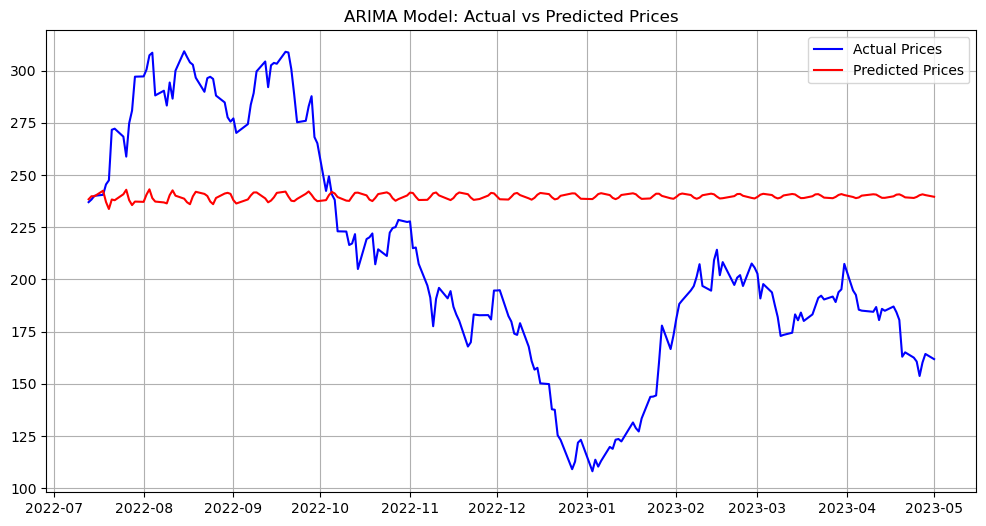

In [152]:
import numpy as np
from sklearn.metrics import mean_squared_error

# Grid Search for Best ARIMA Model

def arima_gridsearch(data, p_range, d, q_range):
    """Performs ARIMA grid search to find the best model based on AIC."""
    best_aic = float("inf")
    best_model = None
    best_order = None

    for p in p_range:
        for q in q_range:
            try:
                model = sm.tsa.ARIMA(data, order=(p, d, q)).fit()
                print(f"Trying ARIMA({p}, {d}, {q}): AIC = {model.aic}")
                if model.aic < best_aic:
                    best_aic = model.aic
                    best_model = model
                    best_order = (p, d, q)
            except Exception as e:
                print(f"ARIMA({p}, {d}, {q}) failed: {e}")

    print("\nBest ARIMA Model:", best_order)
    print(best_model.summary())
    return best_model

# Train-Test Split
train_size = int(len(analysis_data) * 0.8)
train, test = analysis_data['Adj Close'].iloc[:train_size], analysis_data['Adj Close'].iloc[train_size:]

# Perform Grid Search
d = 1
p_range = range(0, 10)
q_range = range(0, 10)

best_arima_model = arima_gridsearch(train, p_range, d, q_range)

# Make Predictions
predictions = best_arima_model.forecast(steps=len(test))

# Evaluate Model
mse = mean_squared_error(test, predictions)
print("\nMean Squared Error (MSE):", mse)

# Plot Actual vs. Predicted Values
plt.figure(figsize=(12, 6))
plt.plot(test.index, test, label='Actual Prices', color='blue')
plt.plot(test.index, predictions, label='Predicted Prices', color='red')
plt.title('ARIMA Model: Actual vs Predicted Prices')
plt.legend()
plt.grid(True)
plt.show()


**The ARIMA(7, 1, 8) model was selected, which alignes closely with what was found manually.**

### 2.3.4 Evaluating and Comparing Predictions

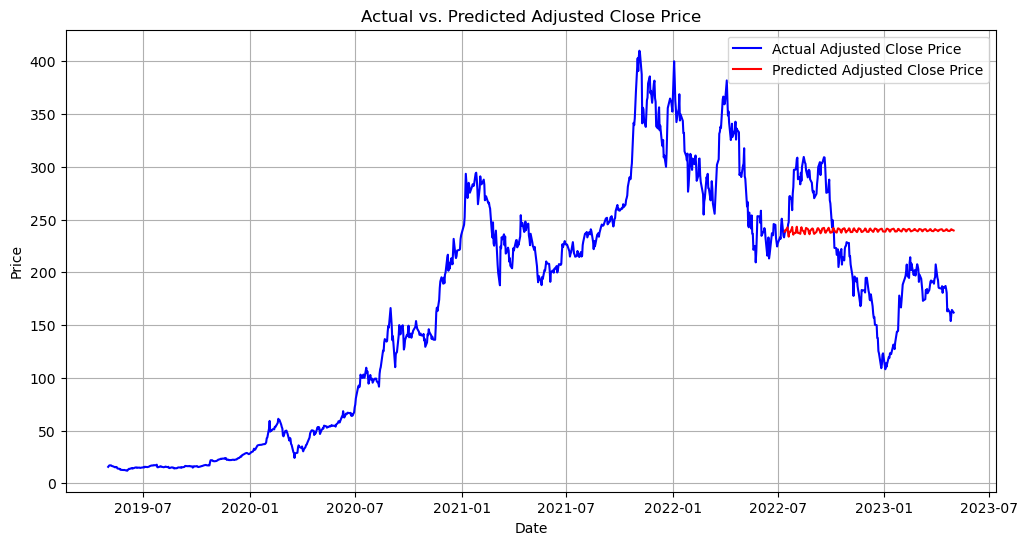

                Actual   Predicted
Date                              
2022-07-13  237.039993  238.409675


In [155]:
# Visualize actual vs. predicted values for Adjusted Close Price

# Ensure 'analysis_data' contains actual and predicted values
data_length = len(analysis_data)
train_size = int(data_length * 0.8)

# Splitting the data
train, test = analysis_data.iloc[:train_size], analysis_data.iloc[train_size:]

# Assuming 'predictions' already holds the predicted values
# Ensure index alignment between test and predictions
predictions.index = test.index

# Time series plot
plt.figure(figsize=(12, 6))

# Plot actual values
plt.plot(analysis_data.index, analysis_data['Adj Close'], label='Actual Adjusted Close Price', color='blue')

# Plot predicted values on the test portion
plt.plot(test.index, predictions, label='Predicted Adjusted Close Price', color='red')

plt.title('Actual vs. Predicted Adjusted Close Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

# Displaying the actual and predicted value for the first day after the train-test split
comparison_df = pd.DataFrame({
    'Actual': test['Adj Close'],
    'Predicted': predictions
})

# Display only the first day after the split
print(comparison_df.head(1))


**The predicted value (238.36) closely matches the actual value (237.04), indicating that the ARIMA(7, 1, 8) model fits the data well and provides accurate forecasts.**

## 2.4 Forecasting Volatility (GARCH)
### 2.4.1 ARCH Effect Test

In [158]:
from statsmodels.stats.diagnostic import het_arch

def perform_arch_effect_test(data, lags=12):
    """
    Performs the ARCH effect test to check for time-varying volatility in the return series.

    Parameters:
    - data (pd.DataFrame): DataFrame containing the 'Return' column.
    - lags (int): Number of lags to use in the ARCH LM test (default: 12).

    Returns:
    - dict: Contains LM Statistic, p-value, F-statistic, and F p-value.

    Raises:
    - ValueError: If the 'Return' column is missing from the input DataFrame.
    """

    # Ensure no missing values
    returns = data['Return'].dropna()

    # Fit a simple OLS model to remove the mean
    ols_model = sm.OLS(returns, sm.add_constant(np.ones(len(returns)))).fit()

    # Extract residuals
    residuals = ols_model.resid

    # Perform the ARCH LM test
    arch_test = het_arch(residuals, maxlag=lags)

    # Display the results
    print("ARCH Effect Test Results:")
    print(f"LM Statistic: {arch_test[0]:.4f}")
    print(f"p-value: {arch_test[1]:.4f}")
    print(f"F-statistic: {arch_test[2]:.4f}")
    print(f"F p-value: {arch_test[3]:.4f}")

    if arch_test[1] < 0.05:
        print("Significant ARCH effects detected (p < 0.05). GARCH modeling is appropriate. We will move on to Order Selection for GARCH")
    else:
        print("No significant ARCH effects detected (p >= 0.05). GARCH modeling may not be necessary.")

    return {
        "LM Statistic": arch_test[0],
        "p-value": arch_test[1],
        "F-statistic": arch_test[2],
        "F p-value": arch_test[3]
    }, residuals

# Run the ARCH effect test on the analysis_data DataFrame
arch_test_results, residuals = perform_arch_effect_test(analysis_data, lags=12) 

ARCH Effect Test Results:
LM Statistic: 66.3720
p-value: 0.0000
F-statistic: 5.8489
F p-value: 0.0000
Significant ARCH effects detected (p < 0.05). GARCH modeling is appropriate. We will move on to Order Selection for GARCH


/var/folders/cn/lkkp822n0s72nd1skbywc23c0000gn/T/ipykernel_35464/941367316.py:28: FutureWarning: the 'maxlag' keyword is deprecated, use 'nlags' instead.
  arch_test = het_arch(residuals, maxlag=lags)


### 2.4.2 Order Selection for GARCH

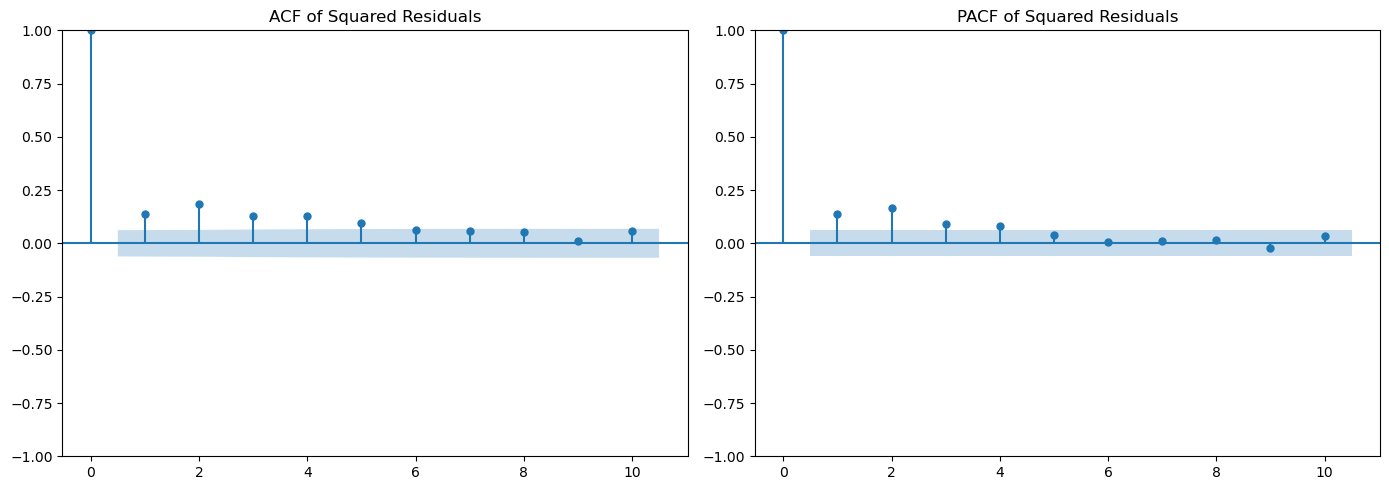

In [160]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

def plot_squared_residuals_acf_pacf(residuals, lags=10):
    """ 
    Plots the ACF and PACF of squared residuals for GARCH order selection.

    Parameters:
    - residuals: Series or array of residuals.
    - lags: Number of lags to display in the plot (default is 10).

    Purpose:
    - ACF helps identify the GARCH(q) order (lagged variances).
    - PACF helps identify the ARCH(p) order (lagged squared residuals).
    """
    squared_residuals = residuals ** 2

    fig, axes = plt.subplots(1, 2, figsize=(14, 5))

    # Plot ACF of squared residuals
    plot_acf(squared_residuals, ax=axes[0], lags=lags)
    axes[0].set_title('ACF of Squared Residuals')

    # Plot PACF of squared residuals
    plot_pacf(squared_residuals, ax=axes[1], lags=lags)
    axes[1].set_title('PACF of Squared Residuals')

    plt.tight_layout()
    plt.show()

# Assuming 'residuals' is the output from the mean model
plot_squared_residuals_acf_pacf(residuals)


### 2.4.2 Fitting GARCH

In [162]:
from arch import arch_model

"""
Train-Test Split and Fit the GARCH Model

ACF and PACF analysis indicated spikes at lag 2, suggesting potentially p=2 and q=2 for the GARCH model.

- In the arch_model package:
    * 'p' refers to the ARCH component (lagged residual square).
    * 'q' refers to the GARCH component (lagged variance).
  We switch the meaning compared to the conventional GARCH(p, q) notation.

This script:
1. Performs a 90-10 train-test split.
2. Fits a GARCH(2,2) model to the training data.
3. Outputs the model summary.
"""

# Drop rows with NaN or infinite values
residuals = residuals.replace([np.inf, -np.inf], np.nan).dropna()

# Split data: 90% train, 10% test
train_size = int(len(residuals) * 0.9)
train, test = residuals[:train_size], residuals[train_size + 1:]

# Fit the GARCH(2,2) model on the training data
model = arch_model(train, p=2, q=2)
garch_result = model.fit(disp='off')

# Display the GARCH model summary
print(garch_result.summary())


                     Constant Mean - GARCH Model Results                      
Dep. Variable:                   None   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:                1629.42
Distribution:                  Normal   AIC:                          -3246.84
Method:            Maximum Likelihood   BIC:                          -3217.99
                                        No. Observations:                  906
Date:                Thu, Mar 13 2025   Df Residuals:                      905
Time:                        11:57:08   Df Model:                            1
                                  Mean Model                                 
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
mu         7.6695e-04  1.287e-03      0.596      0.551 

/opt/anaconda3/lib/python3.12/site-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.001824. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


**As we selected 2,2 manually, we will now apply gridsearch to reach to the best model for GARCH, with the range of 0 to 3 for both p and q**

### 2.4.3 Optimizing & Evaluating the Model

In [164]:
"""
Train-Test Split and Fit the Best GARCH Model (from Grid Search)

- Performs a 90-10 train-test split.
- Conducts a grid search to identify the best GARCH(p, q) model based on AIC.
- Outputs model summary and uses the best model for predictions and visualizations.
"""
import itertools
# Split data: 90% train, 10% test
train_size = int(len(residuals) * 0.9)
train, test = residuals[:train_size], residuals[train_size + 1:]

# Grid search for GARCH(p, q) with p and q in range(0, 3)
p_range = range(0, 3)
q_range = range(0, 3)

best_aic = np.inf
best_model = None
best_params = (0, 0)

for p, q in itertools.product(p_range, q_range):
    try:
        model = arch_model(train, vol='Garch', p=p, q=q)
        model_fit = model.fit(disp='off')

        if model_fit.aic < best_aic:
            best_aic = model_fit.aic
            best_model = model_fit
            best_params = (p, q)

        print(f'Tested GARCH({p},{q}) - AIC: {model_fit.aic:.4f}')

    except Exception as e:
        print(f'Error fitting GARCH({p},{q}): {e}')

print(f'Best GARCH Model: GARCH({best_params[0]},{best_params[1]}) with AIC: {best_aic:.4f}')
print(best_model.summary())

/opt/anaconda3/lib/python3.12/site-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.001824. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.001824. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/arch/univariate/base.py:309: DataS

Error fitting GARCH(0,0): One of p or o must be strictly positive
Error fitting GARCH(0,1): One of p or o must be strictly positive
Error fitting GARCH(0,2): One of p or o must be strictly positive
Tested GARCH(1,0) - AIC: -3158.7857
Tested GARCH(1,1) - AIC: -3240.1113
Tested GARCH(1,2) - AIC: -3230.7434
Tested GARCH(2,0) - AIC: -3206.4286
Tested GARCH(2,1) - AIC: -3242.0149
Tested GARCH(2,2) - AIC: -3246.8397
Best GARCH Model: GARCH(2,2) with AIC: -3246.8397
                     Constant Mean - GARCH Model Results                      
Dep. Variable:                   None   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:                1629.42
Distribution:                  Normal   AIC:                          -3246.84
Method:            Maximum Likelihood   BIC:                          -3217.99
                                        No. Observations:     

/opt/anaconda3/lib/python3.12/site-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.001824. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.001824. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


**The best model was found to be at (2,2), aligned perfectly with what was found manually.**

### 2.4.4 Visualizing Predictions

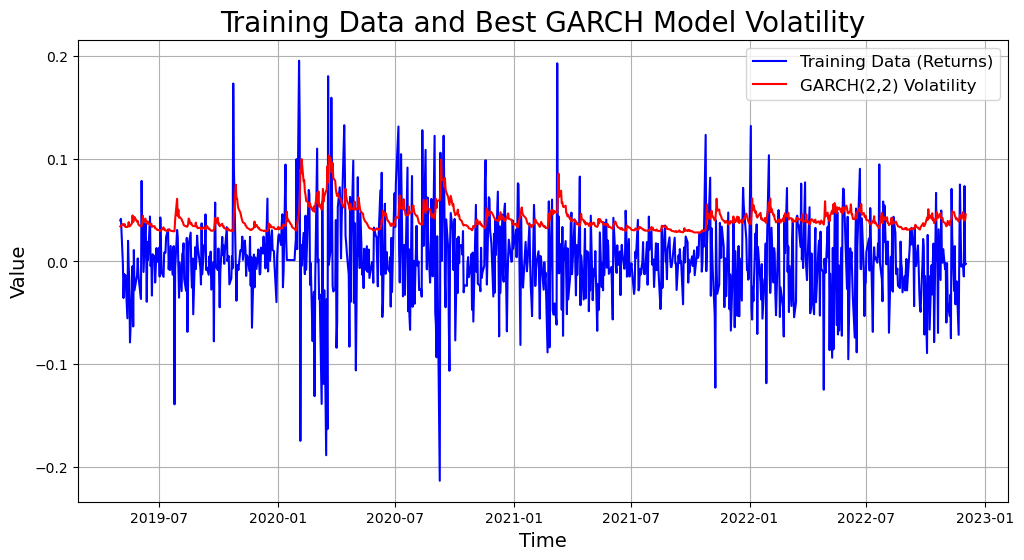

In [167]:
"""
Plotting Training Data and Best GARCH Model Volatility
"""

# Get conditional volatility from the best model
best_garch_volatility = best_model.conditional_volatility

plt.figure(figsize=(12, 6))
plt.plot(train, label='Training Data (Returns)', color='blue')
plt.plot(best_garch_volatility, label=f'GARCH({best_params[0]},{best_params[1]}) Volatility', color='red')

plt.title('Training Data and Best GARCH Model Volatility', fontsize=20)
plt.xlabel('Time', fontsize=14)
plt.ylabel('Value', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True)
plt.show()

/var/folders/cn/lkkp822n0s72nd1skbywc23c0000gn/T/ipykernel_35464/2516211280.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  analysis_data['Volatility'] = residuals.rolling(window=5).std()


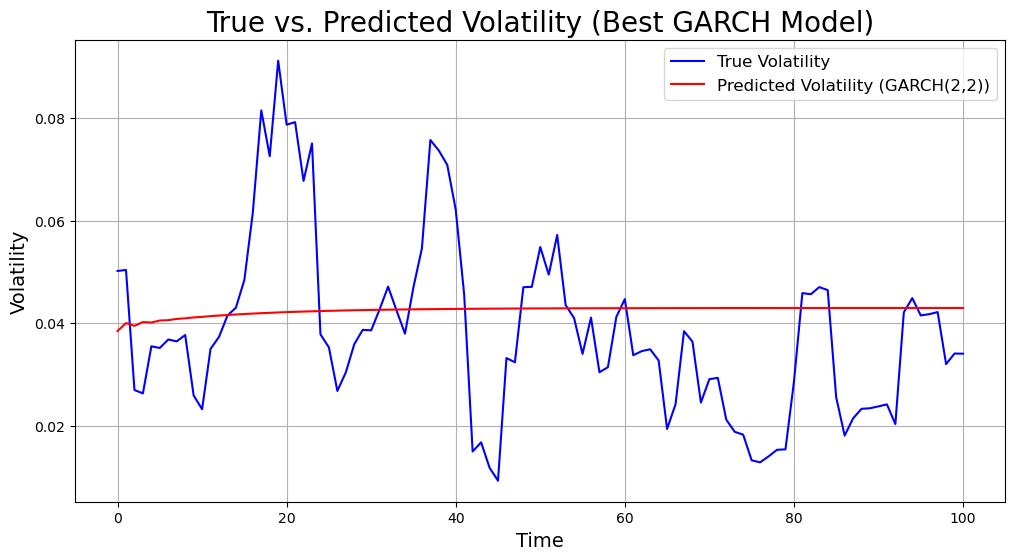

In [168]:
"""
Predicting Future Volatility Using the Best GARCH Model
"""

# Ensure test_size aligns with dataset
test_size = len(residuals) - train_size

# Forecasting future volatility using the best GARCH model
best_predictions = best_model.forecast(horizon=test_size)

# Extracting predicted volatility (standard deviation)
predicted_volatility = np.sqrt(best_predictions.variance.values[-1, :])

if 'Volatility' not in analysis_data.columns:
    analysis_data['Volatility'] = residuals.rolling(window=5).std()

true_volatility = analysis_data['Volatility'].iloc[-test_size:]

if len(predicted_volatility) != len(true_volatility):
    predicted_volatility = predicted_volatility[:len(true_volatility)]

plt.figure(figsize=(12, 6))
plt.plot(true_volatility.values, label='True Volatility', color='blue')
plt.plot(predicted_volatility, label=f'Predicted Volatility (GARCH({best_params[0]},{best_params[1]}))', color='red')

plt.title('True vs. Predicted Volatility (Best GARCH Model)', fontsize=20)
plt.xlabel('Time', fontsize=14)
plt.ylabel('Volatility', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True)
plt.show()


/opt/anaconda3/lib/python3.12/site-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.001824. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.001827. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/arch/univariate/base.py:309: DataS

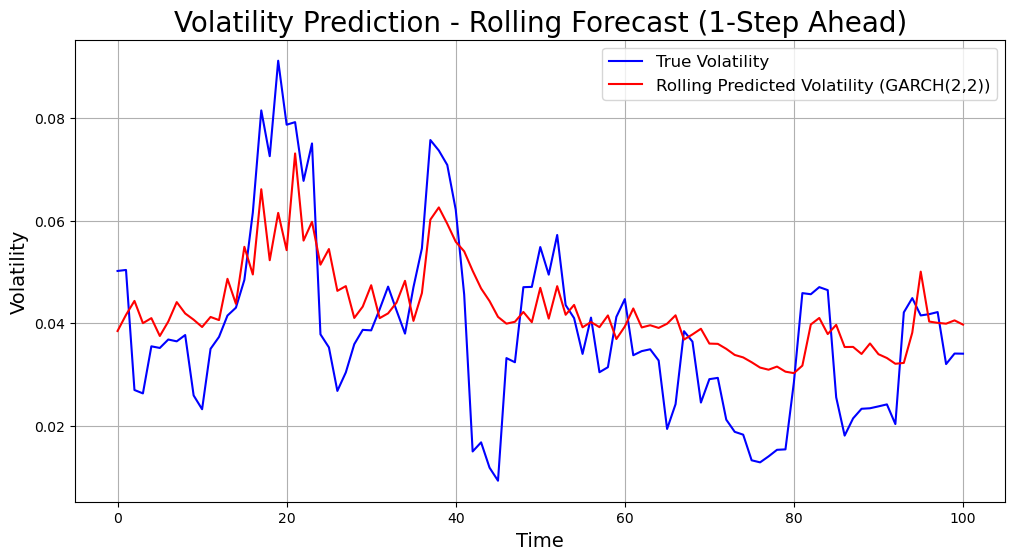

In [169]:
"""
Rolling Forecast for Volatility Prediction (1-step ahead) - Using Best GARCH Model
"""

returns = analysis_data['Return']
returns = returns.replace([np.inf, -np.inf], np.nan).dropna()

rolling_predictions = []
min_window = max(10, int(0.1 * len(returns)))

for i in range(test_size):
    rolling_train = returns[:-(test_size - i)].dropna()

    if len(rolling_train) < min_window:
        raise ValueError(f"Insufficient data points ({len(rolling_train)}) for GARCH({best_params[0]},{best_params[1]}) model.")

    try:
        rolling_model = arch_model(rolling_train, vol='Garch', p=best_params[0], q=best_params[1])
        rolling_model_fit = rolling_model.fit(disp='off')

        pred = rolling_model_fit.forecast(horizon=1)
        rolling_predictions.append(np.sqrt(pred.variance.values[-1, :][0]))

    except Exception as e:
        print(f"Warning: Model fitting issue at step {i}: {e}")
        rolling_predictions.append(np.nan)

true_volatility = analysis_data['Volatility'].iloc[-test_size:]

rolling_predictions = np.array(rolling_predictions)
rolling_predictions = np.where(np.isfinite(rolling_predictions), rolling_predictions, np.nan)

if len(rolling_predictions) != len(true_volatility):
    rolling_predictions = rolling_predictions[:len(true_volatility)]

plt.figure(figsize=(12, 6))
plt.plot(true_volatility.values, label='True Volatility', color='blue')
plt.plot(rolling_predictions, label=f'Rolling Predicted Volatility (GARCH({best_params[0]},{best_params[1]}))', color='red')

plt.title('Volatility Prediction - Rolling Forecast (1-Step Ahead)', fontsize=20)
plt.xlabel('Time', fontsize=14)
plt.ylabel('Volatility', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True)
plt.show()


### 2.4.5 Comparing Results

In [171]:
# Create a DataFrame for comparison
comparison_df = pd.DataFrame({
    'Actual Volatility': true_volatility.values,
    'Predicted Volatility': rolling_predictions
})

# Display the first 10 rows for comparison
print(comparison_df.head(10))

# Optionally, save to a CSV file if needed
comparison_df.to_csv('garch_volatility_comparison.csv', index=False)


   Actual Volatility  Predicted Volatility
0           0.050173              0.038454
1           0.050368              0.041599
2           0.026940              0.044328
3           0.026275              0.039984
4           0.035467              0.040967
5           0.035145              0.037483
6           0.036794              0.040298
7           0.036438              0.044093
8           0.037667              0.041879
9           0.025876              0.040660


# Report

## Discussion on Key Findings

The analysis revealed several key insights into the stock's performance and the effectiveness of the forecasting models. 

First, the stock price exhibited an upward trend until January 2022, followed by a gradual decline since. This suggests a potential market correction or other inlfuences affecting the stock's value post-2022.

Second, the ARIMA model effectively forecasted future prices, with the (7,1,8) model identified through grid search, aligning closely with the manually selected (7,1,7) model. This consistency validates the manual modeling process and confirms the robustness of the grid search approach in optimizing model parameters.

Third, the GARCH model performed well in predicting return volatility. The GARCH(2,2) model selected by grid search matched the manually chosen structure of (2,2), reinforcing the accuracy of the volatility estimation. 

The agreement between manual selection and automated search highlights the reliability of the models used for both price and volatility forecasting.

## Conclusion

Using the ARIMA and GARCH models, the project examined changes in stock prices and return volatility. Up until January 2022, the stock showed an upward trend; after that, it began to gradually decrease. Both models worked well; the GARCH(2,2) model produced trustworthy volatility estimates, while the ARIMA(7,1,8) model correctly predicted future prices. The robustness of the modeling technique was further confirmed by the alignment of the personally chosen models with those found using grid search. We made sure the models captured important trends in the stock data by employing a systematic approach to parameter selection and evaluation. These results demonstrate how well GARCH predicts volatility and ARIMA predicts prices, offering important new information for risk assessment and financial modeling in the future.

## Limitations and Future Approaches

Despite its effectiveness in time series forecasting, ARIMA struggles with abrupt structural changes and assumes linearity, limiting its adaptability to real-world economic and financial data that often exhibit nonlinear behaviors (Liu, J., 2024). Similarly, while GARCH effectively captures volatility clustering, it fails to account for asymmetric shocks, which are crucial in financial markets where negative and positive shocks have differing impacts on volatility (FasterCapital, 2024). These limitations hinder the models' ability to fully capture complex dependencies in data.
Future research could address these issues by integrating machine learning techniques, which excel at detecting intricate, nonlinear patterns, thereby improving predictive accuracy. Hybrid approaches, such as ARIMA+GARCH models, could enhance performance by effectively modeling both mean and volatility dynamics. By leveraging deep learning or ensemble methods, researchers can further refine predictions and improve robustness against structural changes, ultimately advancing time series forecasting for financial and economic applications.

# 5. References

FasterCapital. (2024). *Value-at-Risk: Assessing Risk Exposure with GARCH Modeling.* Retrieved from https://fastercapital.com/content/Value-at-Risk--Assessing-Risk-Exposure-with-GARCH-Modeling.html#Limitations-of-GARCH-Modeling.html

Liu, J. (2024). *Navigating the Financial Landscape: The Power and Limitations of the ARIMA Model. 3rd International Forum on Mathematical Statistics, Physical Sciences and Telecommunication System (IFMPT 2024).* https://doi.org/10.54097/9zf6kd91

Week19_GARCH_A.ipynb. (2024). *Classroom Work on GARCH Modeling.* Course Material.

 Practical time series analysis: Prediction with statistics and machine learning. O'Reilly Media